# SEaM data plotter

Plots the data from a SEaM spreadsheet as a series of bar charts. Change the filename in the marked cell to input from a new spreadsheet, then run all.

AFAIK, the data is in a standard format.

In [21]:
import pandas as pd

import matplotlib.pyplot as plt

In [22]:
# Change this line to read the seam file

feedback_df=pd.read_excel('random SEaM data 1.xlsx', sheetname=2)

**Now run all cells**

In [23]:
responseLabels_ls=['5. Definitely disagree',
                   '4. Mostly disagree',
                   '3. Neither agree nor disagree',
                   '2. Mostly agree',
                   '1. Definitely agree']

In [24]:
questions_ls=feedback_df.columns

In [25]:
len(feedback_df)

100

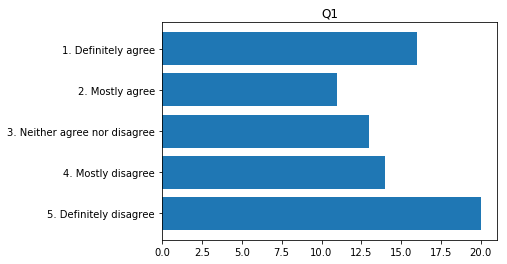

In [26]:
# Plot feedback as bar chart

q=0

data=feedback_df[questions_ls[q]].value_counts()

plt.barh([i for i in range(5)], [data[responseLabels_ls[i]] for i in range(5)], align='center')

plt.yticks([i for i in range(5)], [responseLabels_ls[i] for i in range(5)])

plt.title(questions_ls[q])

plt.show()

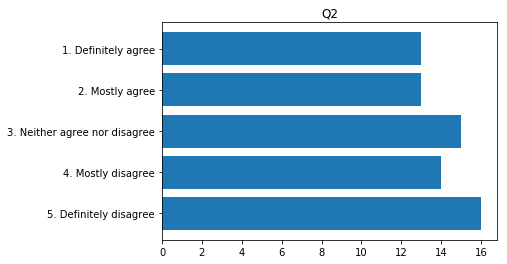

In [27]:
# Plot feedback as bar chart

q=1

data=feedback_df[questions_ls[q]].value_counts()

plt.barh([i for i in range(5)], [data[responseLabels_ls[i]] for i in range(5)], align='center')

plt.yticks([i for i in range(5)], [responseLabels_ls[i] for i in range(5)])

plt.title(questions_ls[q])

plt.show()

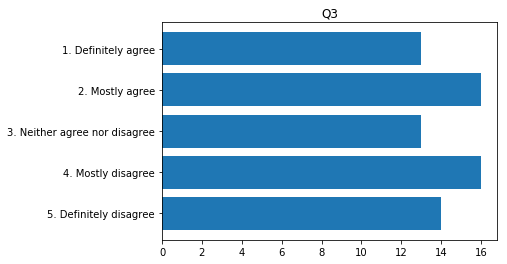

In [28]:
# Plot feedback as bar chart

q=2

data=feedback_df[questions_ls[q]].value_counts()

plt.barh([i for i in range(5)], [data[responseLabels_ls[i]] for i in range(5)], align='center')

plt.yticks([i for i in range(5)], [responseLabels_ls[i] for i in range(5)])

plt.title(questions_ls[q])

plt.show()

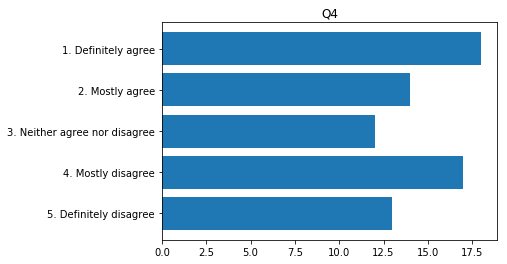

In [29]:
# Plot feedback as bar chart

q=3

data=feedback_df[questions_ls[q]].value_counts()

plt.barh([i for i in range(5)], [data[responseLabels_ls[i]] for i in range(5)], align='center')

plt.yticks([i for i in range(5)], [responseLabels_ls[i] for i in range(5)])

plt.title(questions_ls[q])

plt.show()

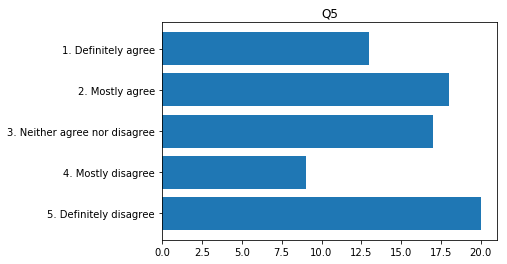

In [30]:
# Plot feedback as bar chart

q=4

data=feedback_df[questions_ls[q]].value_counts()

plt.barh([i for i in range(5)], [data[responseLabels_ls[i]] for i in range(5)], align='center')

plt.yticks([i for i in range(5)], [responseLabels_ls[i] for i in range(5)])

plt.title(questions_ls[q])

plt.show()

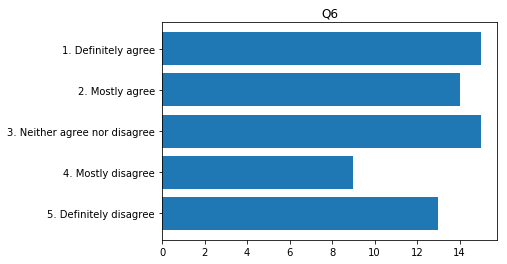

In [31]:
# Plot feedback as bar chart

q=5

data=feedback_df[questions_ls[q]].value_counts()

plt.barh([i for i in range(5)], [data[responseLabels_ls[i]] for i in range(5)], align='center')

plt.yticks([i for i in range(5)], [responseLabels_ls[i] for i in range(5)])

plt.title(questions_ls[q])

plt.show()

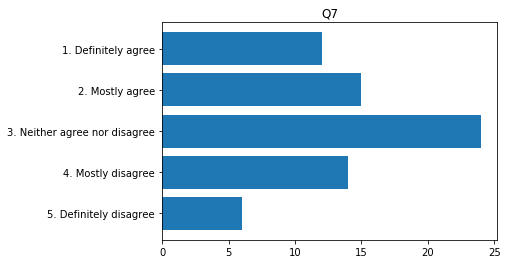

In [32]:
# Plot feedback as bar chart

q=6

data=feedback_df[questions_ls[q]].value_counts()

plt.barh([i for i in range(5)], [data[responseLabels_ls[i]] for i in range(5)], align='center')

plt.yticks([i for i in range(5)], [responseLabels_ls[i] for i in range(5)])

plt.title(questions_ls[q])

plt.show()

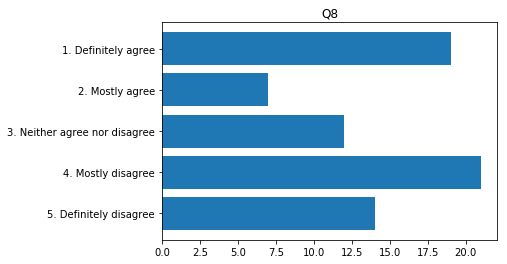

In [33]:
# Plot feedback as bar chart

q=7

data=feedback_df[questions_ls[q]].value_counts()

plt.barh([i for i in range(5)], [data[responseLabels_ls[i]] for i in range(5)], align='center')

plt.yticks([i for i in range(5)], [responseLabels_ls[i] for i in range(5)])

plt.title(questions_ls[q])

plt.show()

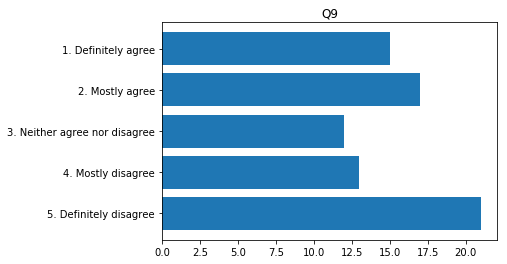

In [34]:
# Plot feedback as bar chart

q=8

data=feedback_df[questions_ls[q]].value_counts()

plt.barh([i for i in range(5)], [data[responseLabels_ls[i]] for i in range(5)], align='center')

plt.yticks([i for i in range(5)], [responseLabels_ls[i] for i in range(5)])

plt.title(questions_ls[q])

plt.show()

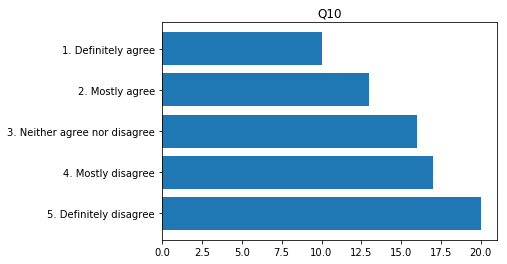

In [35]:
# Plot feedback as bar chart

q=9

data=feedback_df[questions_ls[q]].value_counts()

plt.barh([i for i in range(5)], [data[responseLabels_ls[i]] for i in range(5)], align='center')

plt.yticks([i for i in range(5)], [responseLabels_ls[i] for i in range(5)])

plt.title(questions_ls[q])

plt.show()

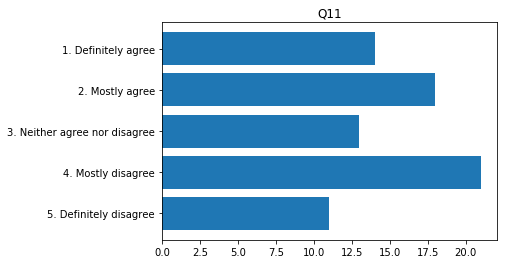

In [36]:
# Plot feedback as bar chart

q=10

data=feedback_df[questions_ls[q]].value_counts()

plt.barh([i for i in range(5)], [data[responseLabels_ls[i]] for i in range(5)], align='center')

plt.yticks([i for i in range(5)], [responseLabels_ls[i] for i in range(5)])

plt.title(questions_ls[q])

plt.show()

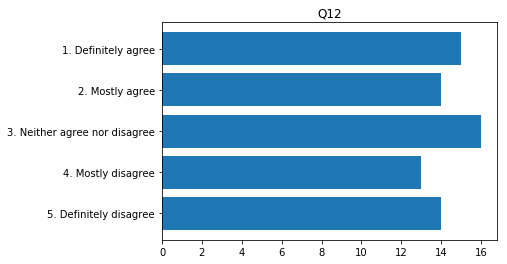

In [37]:
# Plot feedback as bar chart

q=11

data=feedback_df[questions_ls[q]].value_counts()

plt.barh([i for i in range(5)], [data[responseLabels_ls[i]] for i in range(5)], align='center')

plt.yticks([i for i in range(5)], [responseLabels_ls[i] for i in range(5)])

plt.title(questions_ls[q])

plt.show()

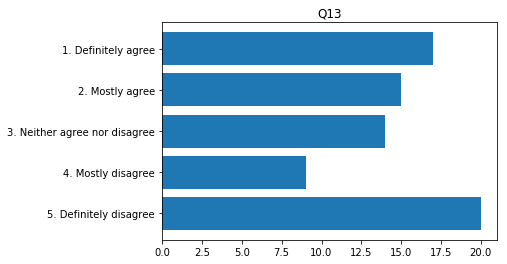

In [38]:
# Plot feedback as bar chart

q=12

data=feedback_df[questions_ls[q]].value_counts()

plt.barh([i for i in range(5)], [data[responseLabels_ls[i]] for i in range(5)], align='center')

plt.yticks([i for i in range(5)], [responseLabels_ls[i] for i in range(5)])

plt.title(questions_ls[q])

plt.show()

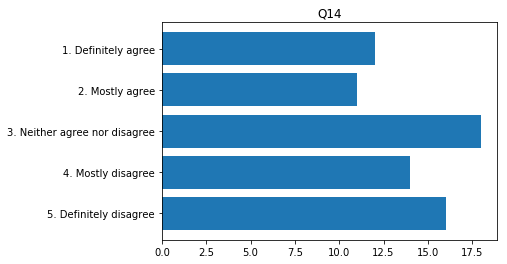

In [39]:
# Plot feedback as bar chart

q=13

data=feedback_df[questions_ls[q]].value_counts()

plt.barh([i for i in range(5)], [data[responseLabels_ls[i]] for i in range(5)], align='center')

plt.yticks([i for i in range(5)], [responseLabels_ls[i] for i in range(5)])

plt.title(questions_ls[q])

plt.show()